In [23]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [3]:
df=pd.read_csv("dummied_full.csv")

In [4]:
train,test,target_train,target_test=train_test_split(df.drop("Target",axis=1),df.Target,test_size=0.33,random_state=42)

In [5]:

xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(train,target_train)

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [6]:
pred=xgb_model.predict(test)
print(confusion_matrix(target_test,pred))

[[  180  1519  2083]
 [  141  4695  6934]
 [  100  2975 14157]]


In [7]:
print(accuracy_score(target_test,pred))

0.5805270863836017


In [8]:
print(f"The most important features contributions is : {np.max(xgb_model.feature_importances_)} feature number {np.argmax(xgb_model.feature_importances_)+1} name: number_inpatient")
#print(np.argmax(xgb_model.feature_importances_))

The most important features contributions is : 0.04581751674413681 feature number 7 name: number_inpatient


# Try scaling numerical features

# EDIT : Useless because xgboost already scales features

In [55]:
data=df[["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses"]]

In [56]:
scaler = StandardScaler()

In [62]:
scaler.fit(data)

StandardScaler()

In [65]:
df[["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses"]]=pd.DataFrame(scaler.transform(data))

In [66]:
df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,...,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,Target
0,-1.138438,-0.097243,-0.783565,-1.850439,-0.291863,-0.211622,-0.500575,-3.298145,1,0,...,0,0,0,0,0,0,0,0,0,NO
1,-0.464673,0.820659,-0.783565,0.249657,-0.291863,-0.211622,-0.500575,0.823436,1,0,...,0,0,0,0,0,0,0,0,0,YES
2,-0.801555,-1.627080,2.152815,-0.368019,1.288995,-0.211622,0.292810,-0.722157,1,0,...,0,0,0,0,0,0,0,0,0,NO
3,-0.801555,0.055741,-0.196289,0.002587,-0.291863,-0.211622,-0.500575,-0.206960,0,1,...,0,0,0,0,0,0,0,0,0,NO
4,-1.138438,0.412703,-0.783565,-0.985694,-0.291863,-0.211622,-0.500575,-1.237355,0,1,...,0,0,0,0,0,0,0,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99338,-0.464673,0.412703,-0.783565,0.002587,-0.291863,-0.211622,-0.500575,0.823436,0,1,...,0,0,0,0,0,0,0,0,0,YES
99339,0.209092,-0.505200,0.978263,0.249657,-0.291863,-0.211622,0.292810,0.823436,1,0,...,0,0,0,0,0,0,0,0,0,NO
99340,-1.138438,0.514692,-0.783565,-0.862159,0.498566,-0.211622,-0.500575,2.884226,0,1,...,0,0,0,0,0,0,0,0,0,NO
99341,1.893505,0.106735,0.390987,0.620262,-0.291863,-0.211622,0.292810,0.823436,1,0,...,0,0,0,0,0,0,0,0,0,NO


In [ ]:
train,test,target_train,target_test=train_test_split(df.drop("Target",axis=1),df.Target,test_size=0.33,random_state=42)

In [67]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(train,target_train)
pred=xgb_model.predict(test)
print(confusion_matrix(target_test,pred))
print(accuracy_score(target_test,pred))

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[12353  4879]
 [ 6998  8554]]
0.6377196193265008


# Trying RandomizedSearchCV next

In [6]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [7]:
clf=RandomizedSearchCV(xgb_model,param_distributions=parameters,random_state=42,n_jobs=-1,cv=10)

search=clf.fit(train,target_train)
search.best_params_

NameError: name 'xgb_model' is not defined

In [20]:
search.best_params_

{'n_estimators': 140, 'max_depth': 9, 'learning_rate': 0.05}

# best Learning rate is 0.05, since it's the last value of the list we might want to try other values 

In [21]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05, 0.02, 0.03, 0.04]
}

In [22]:
clf=RandomizedSearchCV(xgb_model,param_distributions=parameters,random_state=42,n_jobs=-1,cv=10)

search=clf.fit(train,target_train)
search.best_params_

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 140, 'max_depth': 6, 'learning_rate': 0.1}

# Best params overall : n_estimators: 140 | max_depth: 6 | learning_rate: 0.1

In [15]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=140,max_depth=6,learning_rate=0.1,verbosity=0)
xgb_model.fit(train,target_train)
pred=xgb_model.predict(test)
print(confusion_matrix(target_test,pred))
print(accuracy_score(target_test,pred))

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[12634  4598]
 [ 7273  8279]]
0.637902635431918


# Sadly the accuracy barely gets better

In [15]:
import seaborn as sns


<AxesSubplot:xlabel='col_0', ylabel='Target'>

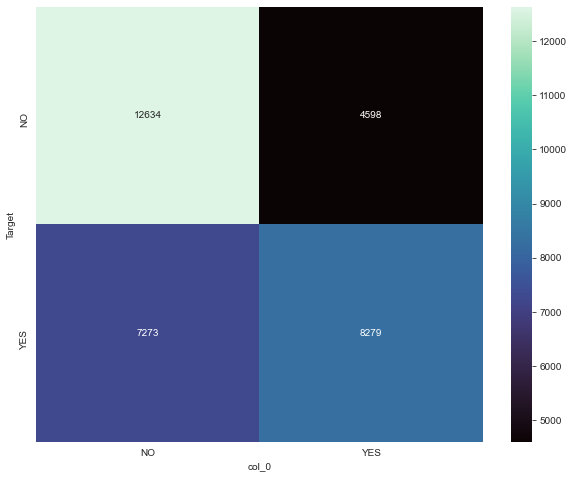

In [21]:
sns.set_style("whitegrid")

cf_matrix=pd.crosstab(target_test,pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True,ax=ax,fmt='g',cmap="mako")

# "Since we are primarily interested in factors that lead to early readmission, we defined the readmission attribute (outcome) as having two values: “readmitted,” if the patient was readmitted within 30 days of discharge or “otherwise” "

In [7]:
df=pd.read_csv("Preprocessed06_12.csv")

In [8]:
#df.loc[df["Target"]=="<30","Target"]="readmitted"
#df.loc[df["Target"]==">30","Target"]="Otherwise"
#df.loc[df["Target"]=="NO","Target"]="Otherwise"

df.Target.unique()

array(['Otherwise', 'readmitted'], dtype=object)

In [9]:
train,test,target_train,target_test=train_test_split(df.drop("Target",axis=1),df.Target,test_size=0.33,random_state=42)

In [10]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(train,target_train)
pred=xgb_model.predict(test)


G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Results before GridSearch

In [11]:
print(confusion_matrix(target_test,pred))
print(accuracy_score(target_test,pred))

[[20931    46]
 [ 2081    34]]
0.9078901784167677


# GridSearch for Xgboost

In [73]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05, 0.02, 0.03, 0.04],
    'scale_pos_weight':[9,10,6]
}

clf=RandomizedSearchCV(xgb_model,param_distributions=parameters,random_state=42,n_jobs=-1,cv=10)

search=clf.fit(train,target_train)
search.best_params_

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'scale_pos_weight': 6,
 'n_estimators': 140,
 'max_depth': 9,
 'learning_rate': 0.02}

# Results with n_estimators: 140 | max_depth: 9 | learning_rate: 0.02

In [97]:
#xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=140,max_depth=6,learning_rate=0.1,verbosity=0,class_weight='balanced',scale_pos_weight=9)
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=140,max_depth=6,learning_rate=0.1,verbosity=0)
xgb_model.fit(train,target_train)
xgb_pred=xgb_model.predict(test)
print(confusion_matrix(target_test,xgb_pred))
print(accuracy_score(target_test,xgb_pred))



G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[20967    10]
 [ 2099    16]]
0.908669669149489


<AxesSubplot:xlabel='col_0', ylabel='Target'>

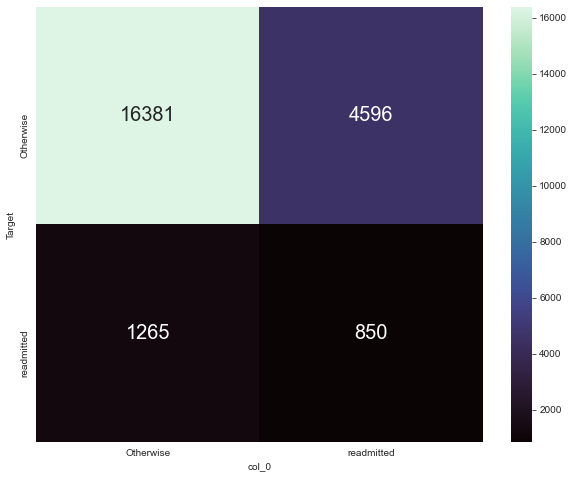

In [82]:
sns.set_style("whitegrid")

cf_matrix=pd.crosstab(target_test,xgb_pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True,ax=ax,fmt='g',cmap="mako",annot_kws={"size":20})

# Showing ROC curve and AUC value

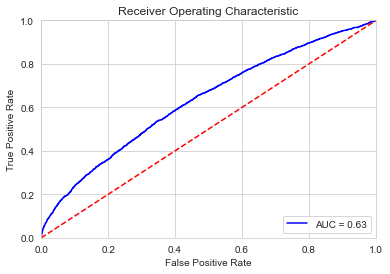

In [24]:
probs=xgb_model.predict_proba(test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(target_test,preds,pos_label="readmitted")
roc_auc=metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Sadly, the target is imbalanced 

In [12]:
import plotly.express as px
fig = px.histogram(df["Target"], x="Target",color="Target",orientation='v')
fig.show()

# So we use  pos_weight = 6 to help with class imbalance

In [13]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=140,max_depth=9,learning_rate=0.02,verbosity=0,scale_pos_weight=6)
xgb_model.fit(train,target_train)
xgb_pred=xgb_model.predict(test)
print(confusion_matrix(target_test,xgb_pred))
print(accuracy_score(target_test,xgb_pred))

G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[[19861  1116]
 [ 1773   342]]
0.8748917373982331


<AxesSubplot:xlabel='col_0', ylabel='Target'>

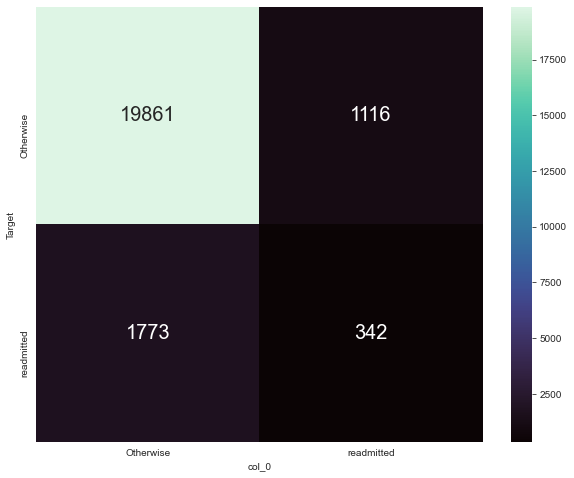

In [16]:
sns.set_style("whitegrid")

cf_matrix=pd.crosstab(target_test,xgb_pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True,ax=ax,fmt='g',cmap="mako",annot_kws={"size":20})

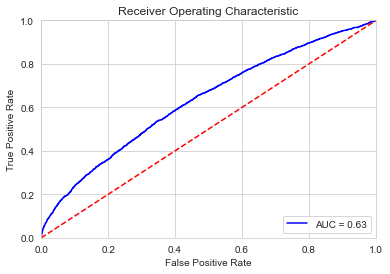

In [25]:
probs=xgb_model.predict_proba(test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(target_test,preds,pos_label="readmitted")
roc_auc=metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM test  !Warning! very long training time

In [10]:
import sklearn

In [24]:
clf2=svm.SVC(kernel="poly")
clf2.fit(train,target_train)

SVC(kernel='poly')

In [25]:
preds=clf2.predict(test)

In [26]:
print(accuracy_score(target_test,preds))

0.8846388482186432


needs to be optimized

# Trying RandomForest

In [21]:
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rndf=RandomForestClassifier(n_estimators=1200,bootstrap=True,max_depth=70,max_features='auto',min_samples_leaf=1,min_samples_split=5)
rndf.fit(train,target_train)

clf=RandomizedSearchCV(rndf,param_distributions=random_grid,random_state=42,n_jobs=-1,cv=10)

search=clf.fit(train,target_train)
search.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [88]:
#rndf=RandomForestClassifier(n_estimators=600,bootstrap=True,max_depth=40,max_features='auto',min_samples_leaf=4,min_samples_split=5,class_weight={"Otherwise":0.1, "readmitted":0.9})
rndf=RandomForestClassifier(n_estimators=600,bootstrap=True,max_depth=40,max_features='auto',min_samples_leaf=4,min_samples_split=5)
rndf.fit(train,target_train)

pred=rndf.predict(test)

print(accuracy_score(target_test,pred))

0.9084098389052486


In [89]:
print(confusion_matrix(target_test,pred))

[[20977     0]
 [ 2115     0]]


<AxesSubplot:xlabel='col_0', ylabel='Target'>

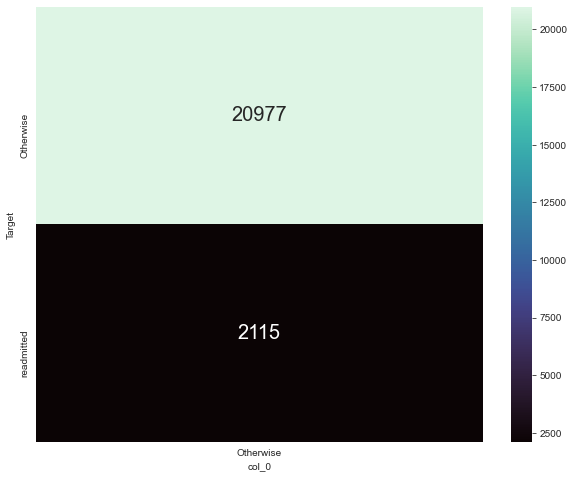

In [90]:
sns.set_style("whitegrid")

cf_matrix=pd.crosstab(target_test,pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True,ax=ax,fmt='g',cmap="mako",annot_kws={"size":20})

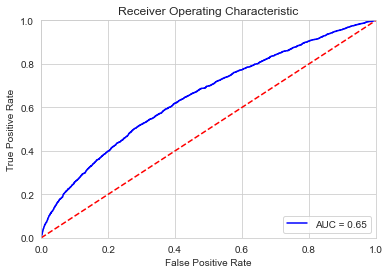

In [87]:
probs=rndf.predict_proba(test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(target_test,preds,pos_label="readmitted")
roc_auc=metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Trying Adaboost

0.9081500086610081


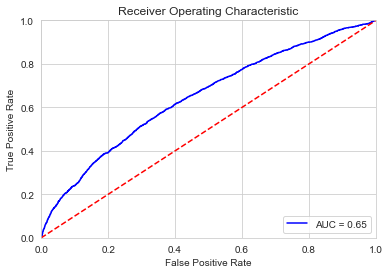

<AxesSubplot:xlabel='col_0', ylabel='Target'>

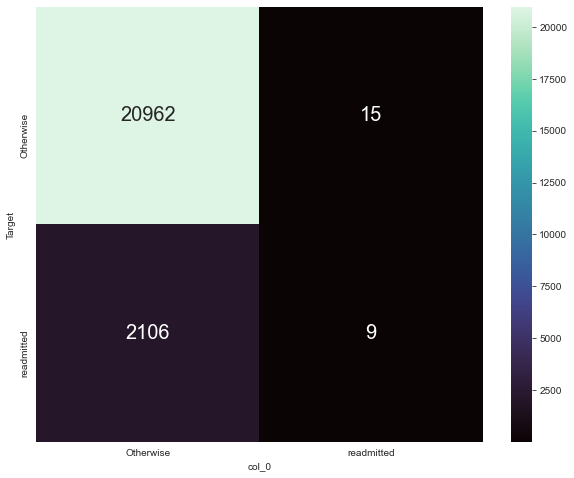

In [80]:
from sklearn.ensemble import AdaBoostClassifier

Ada=AdaBoostClassifier(n_estimators=100, random_state=0).fit(train,target_train)
pred=Ada.predict(test)

print(accuracy_score(target_test,pred))



probs=Ada.predict_proba(test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(target_test,preds,pos_label="readmitted")
roc_auc=metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.set_style("whitegrid")

cf_matrix=pd.crosstab(target_test,pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True,ax=ax,fmt='g',cmap="mako",annot_kws={"size":20})

# Comparing models

In [91]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [92]:
models=[]
models.append(('xgb',xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=140,max_depth=6,learning_rate=0.1,verbosity=0,class_weight='balanced',scale_pos_weight=9)))
models.append(('RandomForest',RandomForestClassifier(n_estimators=600,bootstrap=True,max_depth=40,max_features='auto',min_samples_leaf=4,min_samples_split=5,class_weight={"Otherwise":0.1, "readmitted":0.9})))
models.append(("adaBoost",AdaBoostClassifier(n_estimators=100, random_state=0)))
models.append(("logistic",LogisticRegression(class_weight='balanced')))

In [93]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
    cv_results = model_selection.cross_val_score(model, train, target_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison


G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Users\Othma\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

xgb: 0.751690 (0.006385)
RandomForest: 0.905228 (0.003630)
adaBoost: 0.910987 (0.002578)


G:\Users\Othma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Users\Othma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

logistic: 0.653847 (0.007158)


G:\Users\Othma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


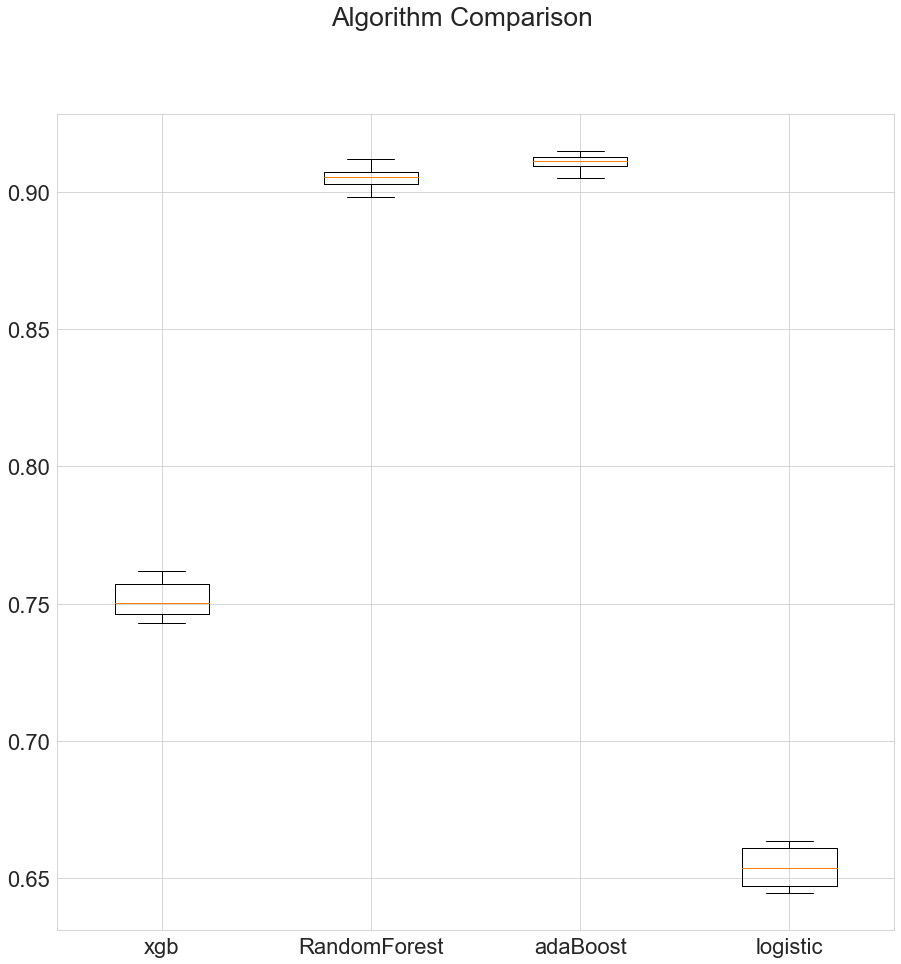

In [112]:
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 22})

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

# Logistic

In [56]:
from sklearn.linear_model import LogisticRegression

In [65]:
logisticRegr = LogisticRegression(class_weight='balanced')

In [66]:
logisticRegr.fit(train, target_train)

G:\Users\Othma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [67]:
logis_pred=logisticRegr.predict(test)

In [68]:
logisticRegr.score(test, target_test)

0.6562012818292049

In [69]:
metrics.confusion_matrix(target_test,logis_pred)

array([[14004,  6973],
       [  966,  1149]], dtype=int64)

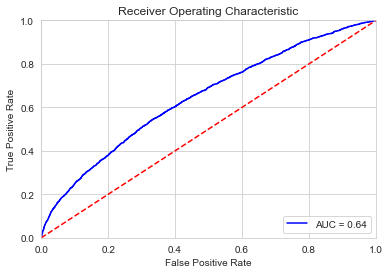

In [70]:
probs=logisticRegr.predict_proba(test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(target_test,preds,pos_label="readmitted")
roc_auc=metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<AxesSubplot:xlabel='col_0', ylabel='Target'>

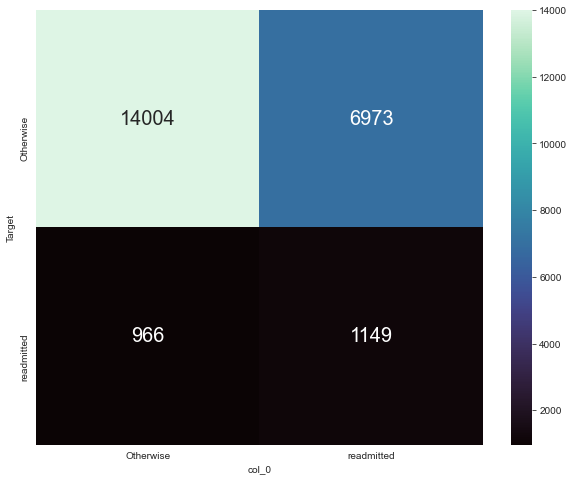

In [71]:
sns.set_style("whitegrid")

cf_matrix=pd.crosstab(target_test,logis_pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True,ax=ax,fmt='g',cmap="mako",annot_kws={"size":20})